In [481]:
import pandas as pd
import numpy as np
import yfinance as yf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [482]:
tickers = ['JPM', 'BAC', 'GS', 'WFC', 'HSBC', 'MS', 'C']
stock_hist_data = yf.download(tickers, start = '2020-01-01')['Adj Close']
stock_hist_data

[*********************100%%**********************]  7 of 7 completed


Ticker,BAC,C,GS,HSBC,JPM,MS,WFC
Date,,,,,,,
2020-01-02,32.048050,68.963692,210.857300,31.634563,123.533592,45.443256,47.959927
2020-01-03,31.382637,67.664719,208.391632,31.144421,121.903404,44.709743,47.665470
2020-01-06,31.337675,67.452477,210.524368,31.039967,121.806503,44.552563,47.379948
2020-01-07,31.130859,66.866684,211.910156,30.806940,119.735695,44.465237,46.987343
2020-01-08,31.445580,67.376076,213.952835,30.734629,120.669746,45.032848,47.130093
...,...,...,...,...,...,...,...
2024-04-17,35.230000,58.169998,403.910004,39.980000,180.080002,90.080002,57.180000
2024-04-18,35.770000,58.320000,403.109985,40.389999,181.250000,90.260002,58.740002
2024-04-19,36.970001,59.139999,404.000000,40.520000,185.800003,90.660004,60.349998


<Axes: title={'center': 'Historical Prices'}, xlabel='Date'>

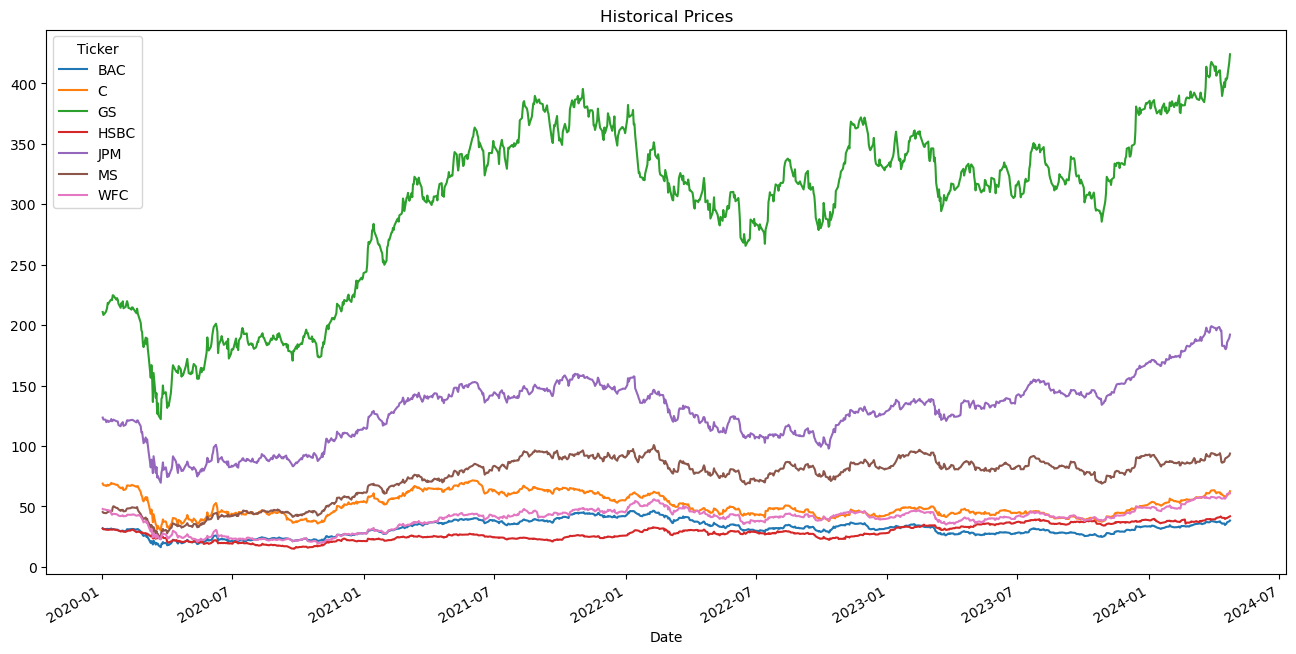

In [483]:
stock_hist_data.plot(figsize = (16,8), title = 'Historical Prices')

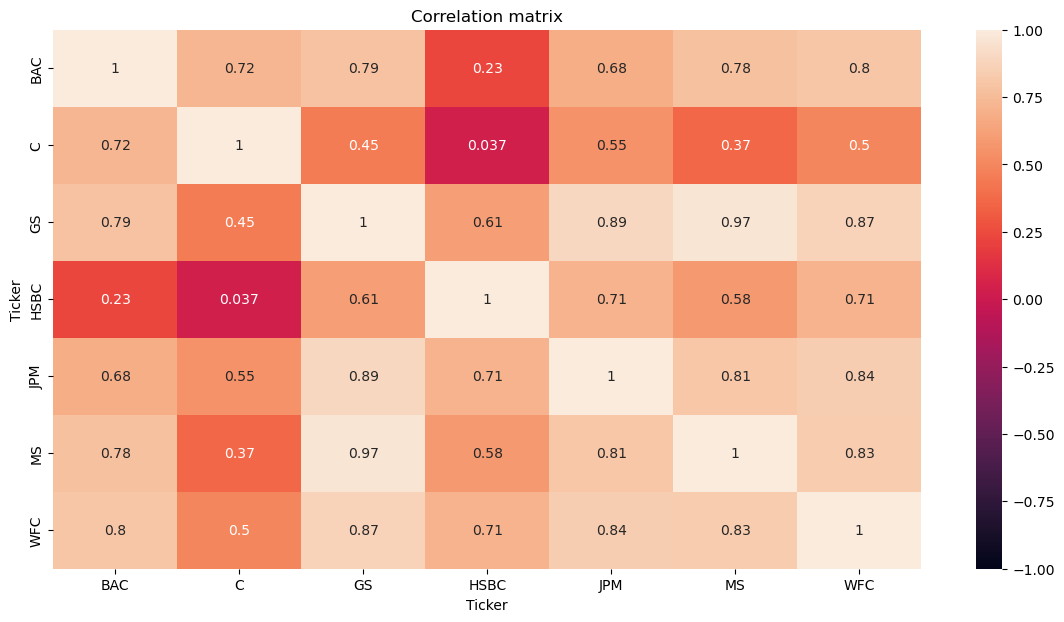

In [484]:
correlation_matrix = stock_hist_data.corr()
plt.figure(figsize=(14,7))
heatmap = sns.heatmap(correlation_matrix, vmin= -1, vmax=1, annot = True)
heatmap.set_title('Correlation matrix')
plt.show()

<Axes: title={'center': 'Highly correlate stocks'}, xlabel='Date'>

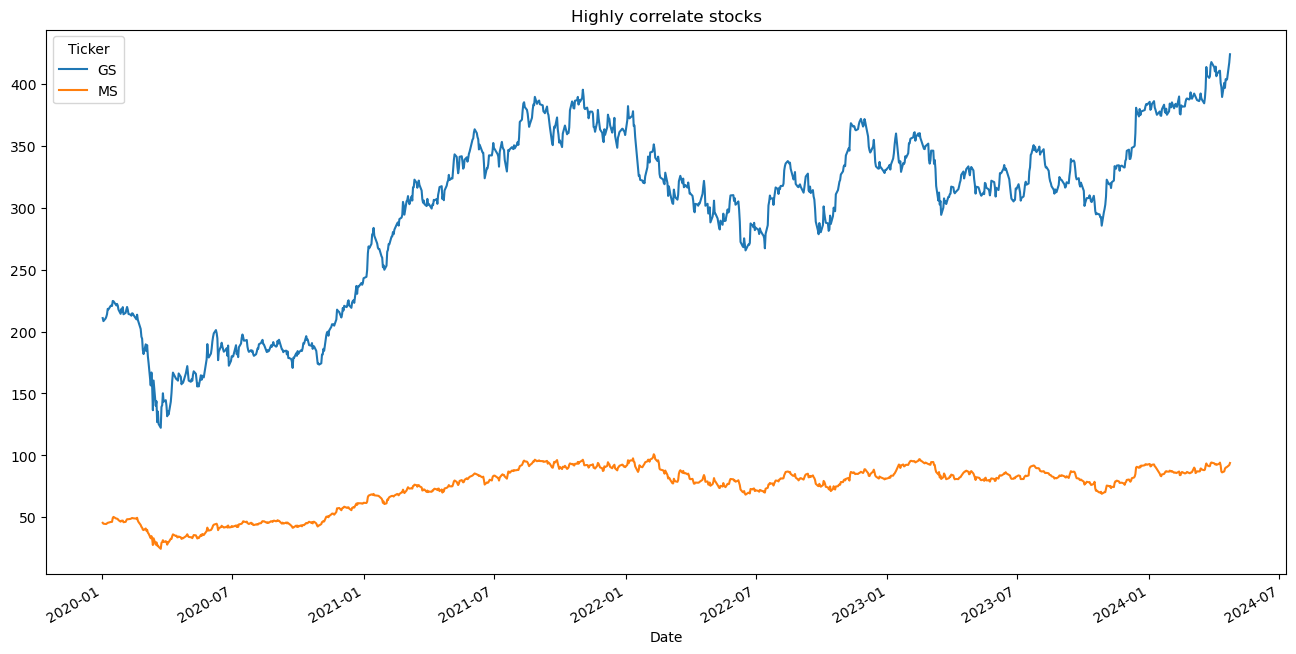

In [485]:
stock_A = 'GS'
stock_B = 'MS'
correlated_stocks_data = stock_hist_data[[stock_A, stock_B]]
correlated_stocks_data.plot(figsize = (16,8), title = 'Highly correlate stocks')

In [486]:
correlated_stocks_data['Price Ratio'] = correlated_stocks_data[stock_B] / correlated_stocks_data[stock_A]
correlated_stocks_data

C:\Users\miros\AppData\Local\Temp\ipykernel_16676\283988708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlated_stocks_data['Price Ratio'] = correlated_stocks_data[stock_B] / correlated_stocks_data[stock_A]


Ticker,GS,MS,Price Ratio
Date,,,
2020-01-02,210.857300,45.443256,0.215517
2020-01-03,208.391632,44.709743,0.214547
2020-01-06,210.524368,44.552563,0.211627
2020-01-07,211.910156,44.465237,0.209831
2020-01-08,213.952835,45.032848,0.210480
...,...,...,...
2024-04-17,403.910004,90.080002,0.223020
2024-04-18,403.109985,90.260002,0.223909
2024-04-19,404.000000,90.660004,0.224406


In [487]:
correlated_stocks_data['Price Ratio 15D MA'] = correlated_stocks_data['Price Ratio'].rolling(15).mean()
correlated_stocks_data

C:\Users\miros\AppData\Local\Temp\ipykernel_16676\2841505177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlated_stocks_data['Price Ratio 15D MA'] = correlated_stocks_data['Price Ratio'].rolling(15).mean()


Ticker,GS,MS,Price Ratio,Price Ratio 15D MA
Date,,,,
2020-01-02,210.857300,45.443256,0.215517,NaN
2020-01-03,208.391632,44.709743,0.214547,NaN
2020-01-06,210.524368,44.552563,0.211627,NaN
2020-01-07,211.910156,44.465237,0.209831,NaN
2020-01-08,213.952835,45.032848,0.210480,NaN
...,...,...,...,...
2024-04-17,403.910004,90.080002,0.223020,0.224694
2024-04-18,403.109985,90.260002,0.223909,0.224610
2024-04-19,404.000000,90.660004,0.224406,0.224542


In [488]:
Price_ratio_STD = correlated_stocks_data['Price Ratio'].rolling(15).std()
Price_ratio_STD

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2024-04-17    0.003458
2024-04-18    0.003461
2024-04-19    0.003453
2024-04-22    0.003559
2024-04-23    0.003601
Name: Price Ratio, Length: 1084, dtype: float64

In [489]:
correlated_stocks_data['Lower'] = correlated_stocks_data['Price Ratio 15D MA'] - 1.96 * Price_ratio_STD
correlated_stocks_data['Upper'] = correlated_stocks_data['Price Ratio 15D MA'] + 1.96 * Price_ratio_STD

correlated_stocks_data

C:\Users\miros\AppData\Local\Temp\ipykernel_16676\3586479988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlated_stocks_data['Lower'] = correlated_stocks_data['Price Ratio 15D MA'] - 1.96 * Price_ratio_STD
C:\Users\miros\AppData\Local\Temp\ipykernel_16676\3586479988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlated_stocks_data['Upper'] = correlated_stocks_data['Price Ratio 15D MA'] + 1.96 * Price_ratio_STD


Ticker,GS,MS,Price Ratio,Price Ratio 15D MA,Lower,Upper
Date,,,,,,
2020-01-02,210.857300,45.443256,0.215517,NaN,NaN,NaN
2020-01-03,208.391632,44.709743,0.214547,NaN,NaN,NaN
2020-01-06,210.524368,44.552563,0.211627,NaN,NaN,NaN
2020-01-07,211.910156,44.465237,0.209831,NaN,NaN,NaN
2020-01-08,213.952835,45.032848,0.210480,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-04-17,403.910004,90.080002,0.223020,0.224694,0.217917,0.231471
2024-04-18,403.109985,90.260002,0.223909,0.224610,0.217827,0.231393
2024-04-19,404.000000,90.660004,0.224406,0.224542,0.217773,0.231311


In [490]:
position = np.zeros(len(correlated_stocks_data))

for i in range(15, len(correlated_stocks_data)):
    if correlated_stocks_data['Price Ratio'][i] > correlated_stocks_data['Upper'][i] or correlated_stocks_data['Price Ratio'][i] < correlated_stocks_data['Lower'][i]:
        position[i] = 1

C:\Users\miros\AppData\Local\Temp\ipykernel_16676\2226788134.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if correlated_stocks_data['Price Ratio'][i] > correlated_stocks_data['Upper'][i] or correlated_stocks_data['Price Ratio'][i] < correlated_stocks_data['Lower'][i]:


In [491]:
position

array([0., 0., 0., ..., 0., 0., 0.])

In [492]:
exit = np.zeros(len(correlated_stocks_data))

for i in range(15, len(correlated_stocks_data)):
    if position[i] == 1:
        if correlated_stocks_data['Price Ratio'][i] <= correlated_stocks_data['Upper'][i] and correlated_stocks_data['Price Ratio'][i] >= correlated_stocks_data['Lower'][i]:
            exit[i] = 1
        elif i - np.argmax(position[i-5:i]) >= 5:
            exit[i] = 1

C:\Users\miros\AppData\Local\Temp\ipykernel_16676\2160983378.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if correlated_stocks_data['Price Ratio'][i] <= correlated_stocks_data['Upper'][i] and correlated_stocks_data['Price Ratio'][i] >= correlated_stocks_data['Lower'][i]:


C:\Users\miros\AppData\Local\Temp\ipykernel_16676\3420292921.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if pl_ratio[i] > 0:


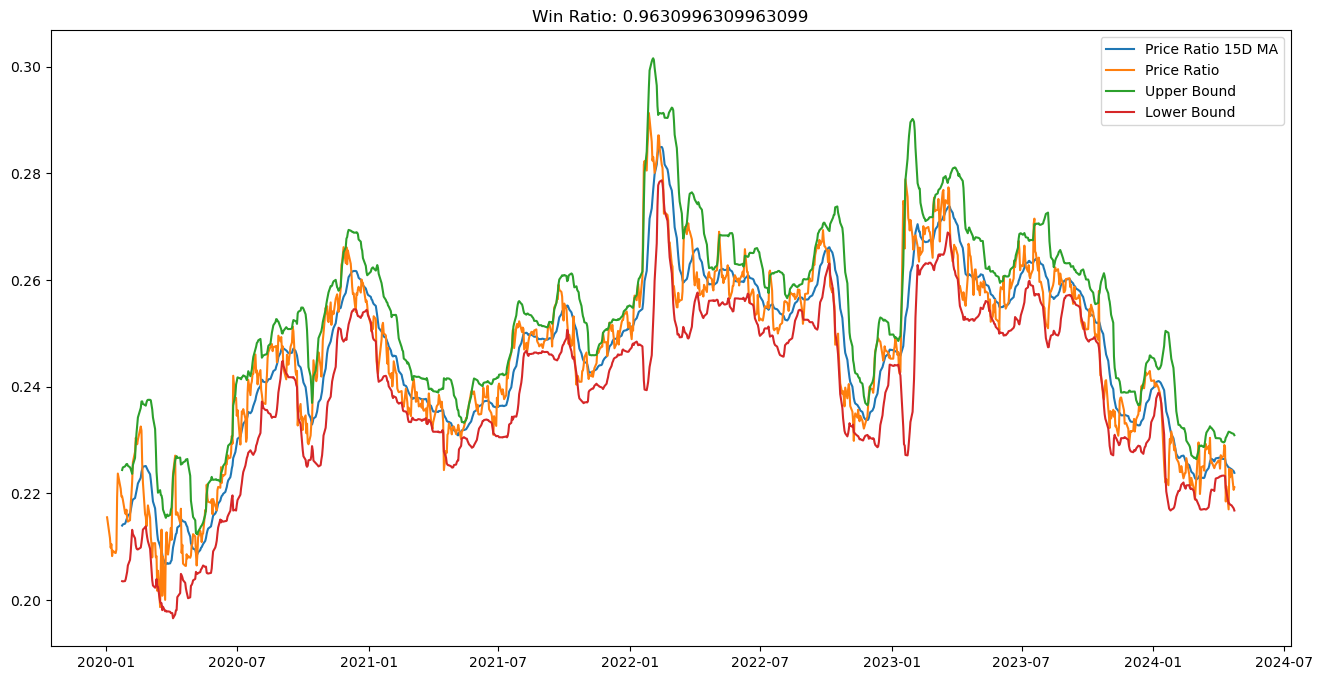

In [493]:
pl_ratio = np.cumsum(position * (correlated_stocks_data['Price Ratio'] - correlated_stocks_data['Price Ratio'].shift(1)))

win_counter = 0
for i in range(len(pl_ratio)):
    if pl_ratio[i] > 0:
        win_counter = win_counter + 1

win_ratio = win_counter/len(pl_ratio)

plt.figure(figsize=(16, 8))
plt.plot(correlated_stocks_data['Price Ratio 15D MA'], label='Price Ratio 15D MA')
plt.plot(correlated_stocks_data['Price Ratio'], label='Price Ratio')
plt.plot(correlated_stocks_data['Upper'], label='Upper Bound')
plt.plot(correlated_stocks_data['Lower'], label='Lower Bound')
plt.legend()
plt.title(f'Win Ratio: {win_ratio}')
plt.show()

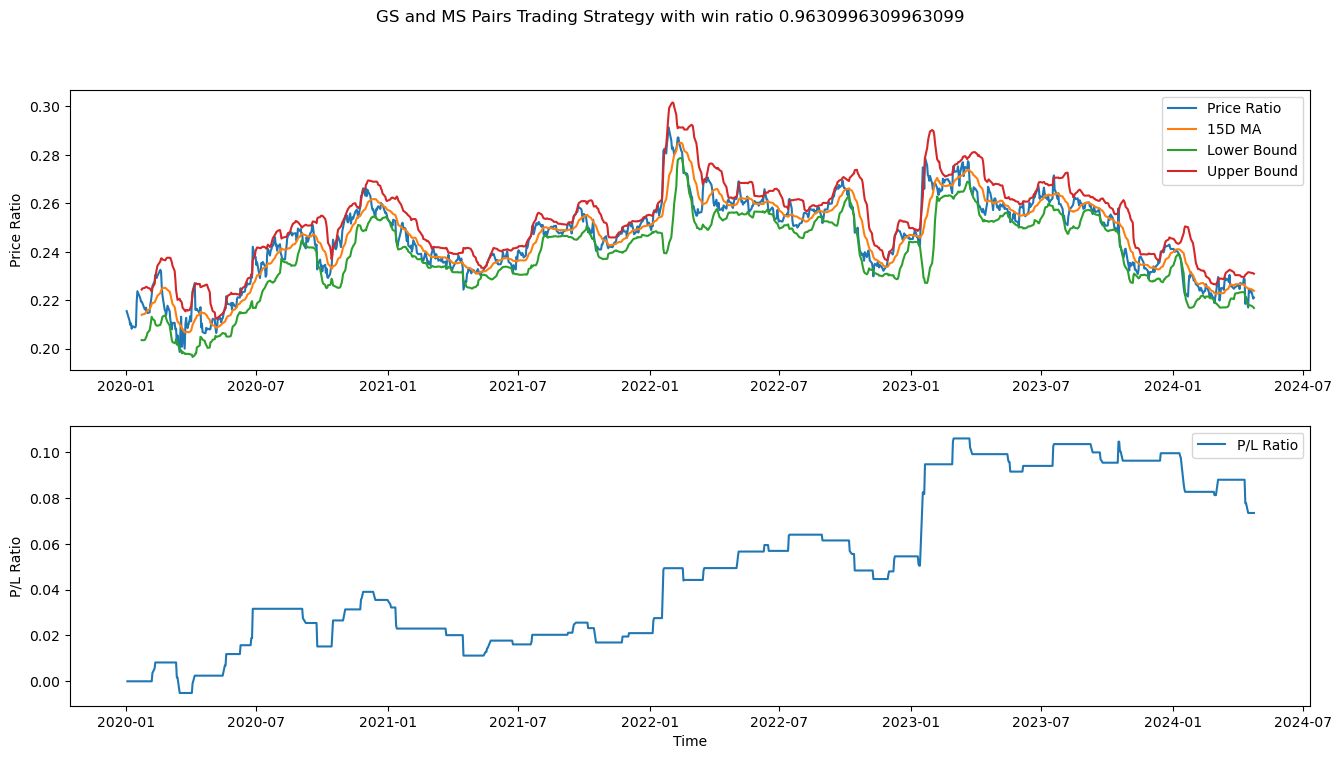

In [494]:
fig, axs = plt.subplots(2, sharex=True, figsize = (16,8))

axs[0].plot(correlated_stocks_data.index, correlated_stocks_data['Price Ratio'], label='Price Ratio')
axs[0].plot(correlated_stocks_data.index, correlated_stocks_data['Price Ratio 15D MA'], label='15D MA')
axs[0].plot(correlated_stocks_data.index, correlated_stocks_data['Lower'], label='Lower Bound')
axs[0].plot(correlated_stocks_data.index, correlated_stocks_data['Upper'], label='Upper Bound')
axs[0].set_ylabel('Price Ratio')
axs[0].legend()

axs[1].plot(correlated_stocks_data.index, pl_ratio, label='P/L Ratio')
axs[1].set_ylabel('P/L Ratio')
axs[1].set_xlabel('Time')
axs[1].legend()

axs[0].tick_params(labelbottom = True)
axs[1].tick_params(labelbottom = True)

plt.suptitle(f'{stock_A} and {stock_B} Pairs Trading Strategy with win ratio {win_ratio}')
plt.show()

In [495]:
CT_portfolio = correlated_stocks_data[[stock_A, stock_B]]
CT_stock_returns = CT_portfolio.pct_change()

weights = {stock_A: 0.5, stock_B: 0.5}
weights = np.array([weights[ticker] for ticker in CT_stock_returns.columns])

CT_portfolio_return = CT_stock_returns.dot(weights)
CT_portfolio_return

Date
2020-01-02         NaN
2020-01-03   -0.013917
2020-01-06    0.003359
2020-01-07    0.002311
2020-01-08    0.011202
                ...   
2024-04-17    0.014155
2024-04-18    0.000009
2024-04-19    0.003320
2024-04-22    0.024409
2024-04-23    0.017034
Length: 1084, dtype: float64

In [496]:
CT_position = np.zeros(len(CT_portfolio))

In [497]:
x0 = 0.5
y0 = 0.5
a = 0.1
b = 0.1
c = 0.1
d = 0.1

for i in range(1, len(CT_portfolio)):
    x = x0 + a * (np.sin(y0) - x0)
    y = y0 + b * (np.cos(x0) - y0)
    x0, y0 = x, y
    z = c * (x - d * y)
    if z > 0:
        CT_position[i] = 1
    else:
        CT_position[i] = -1

In [498]:
CT_pl_ratio = np.cumsum(CT_position * CT_portfolio_return)

CT_win_counter = 0
for i in range(len(CT_pl_ratio)):
    if CT_pl_ratio[i] > 0:
        CT_win_counter = CT_win_counter + 1

CT_win_ratio = CT_win_counter/len(pl_ratio)

C:\Users\miros\AppData\Local\Temp\ipykernel_16676\1811796360.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if CT_pl_ratio[i] > 0:


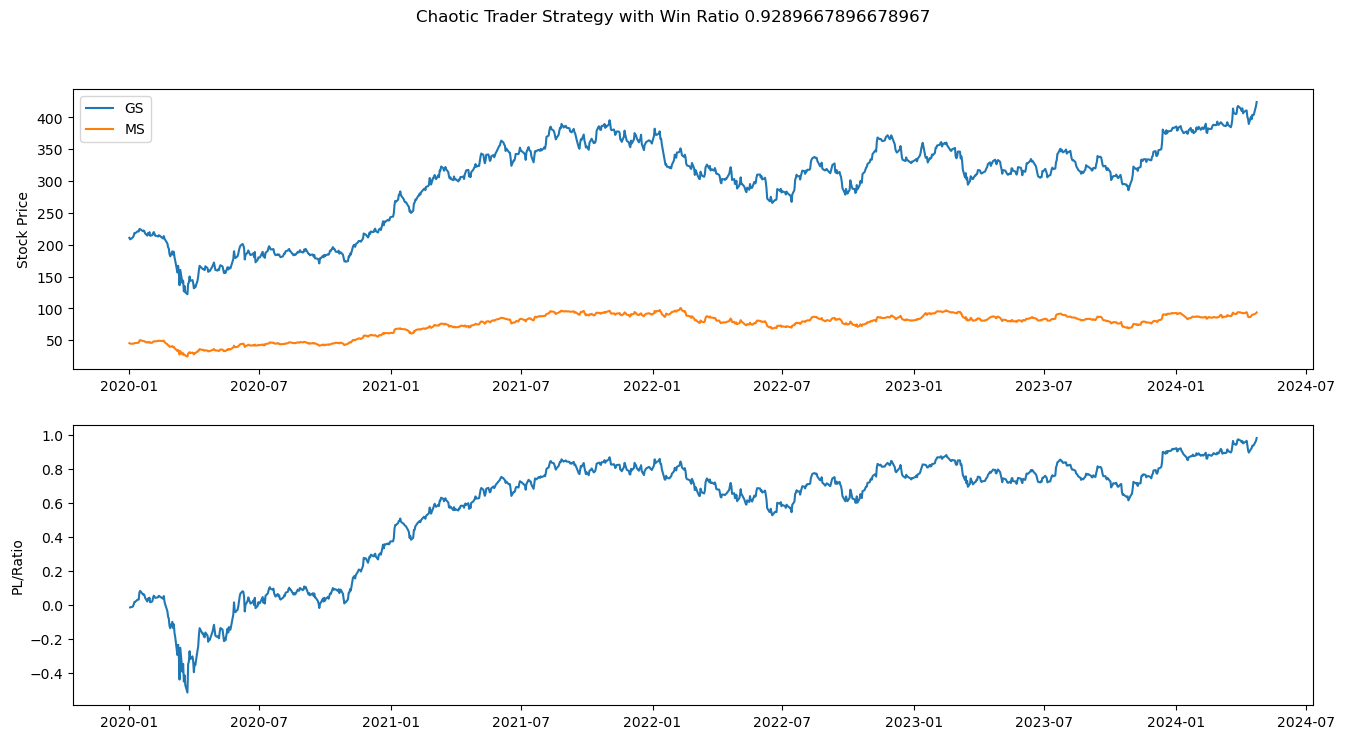

In [499]:
fig, axs = plt.subplots(2, sharex=True, figsize = (16,8))

axs[0].plot(CT_portfolio.index, CT_portfolio[stock_A], label=stock_A)
axs[0].plot(CT_portfolio.index, CT_portfolio[stock_B], label=stock_B)
axs[0].set_ylabel('Stock Price')
axs[0].legend()

axs[1].plot(CT_portfolio.index, CT_pl_ratio, label = 'P/L Ratio')
axs[1].set_ylabel('PL/Ratio')

axs[0].tick_params(labelbottom = True)
axs[1].tick_params(labelbottom = True)

plt.suptitle(f'Chaotic Trader Strategy with Win Ratio {CT_win_ratio}')
plt.show()

In [502]:
print(f'Win Ratio of Pairs Strategy:     {win_ratio:.2%}')
print(f'Win Ratio of the Chaotic Trader: {CT_win_ratio:.2%}')

Win Ratio of Pairs Strategy:     96.31%
Win Ratio of the Chaotic Trader: 92.90%
